In [201]:
import numpy as np
import pandas as pd
import seaborn as snd
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [202]:
df = pd.read_csv('../all_stocks_5yr.csv')
df.head(100)

date   open   high    low  close    volume Name
0   2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1   2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2   2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3   2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4   2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
..         ...    ...    ...    ...    ...       ...  ...
95  2013-06-26  16.50  16.64  16.17  16.17   3604500  AAL
96  2013-06-27  16.29  16.34  16.00  16.31   3566000  AAL
97  2013-06-28  16.24  16.55  16.16  16.42   7063900  AAL
98  2013-07-01  16.50  17.04  16.48  16.80   4666900  AAL
99  2013-07-02  16.78  16.79  16.36  16.43   4009300  AAL

[100 rows x 7 columns]

Data Exploration

In [203]:
df.describe()

open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [205]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [206]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

Data Cleaning and Pre-Processing

In [207]:
# Dropping the Null columns
df.dropna(inplace=True)

# # Changing the Date format from object to Datetime
# df['date'] = pd.to_datetime(df['date'])
# df.info()

df['Year'] = pd.to_datetime(df['date']).dt.year
df = df.drop('date', axis=1)
df

open   high    low  close    volume Name  Year
0       15.07  15.12  14.63  14.75   8407500  AAL  2013
1       14.89  15.01  14.26  14.46   8882000  AAL  2013
2       14.45  14.51  14.10  14.27   8126000  AAL  2013
3       14.30  14.94  14.25  14.66  10259500  AAL  2013
4       14.94  14.96  13.16  13.99  31879900  AAL  2013
...       ...    ...    ...    ...       ...  ...   ...
619035  76.84  78.27  76.69  77.82   2982259  ZTS  2018
619036  77.53  78.12  76.73  76.78   2595187  ZTS  2018
619037  76.64  76.92  73.18  73.83   2962031  ZTS  2018
619038  72.74  74.56  72.13  73.27   4924323  ZTS  2018
619039  72.70  75.00  72.69  73.86   4534912  ZTS  2018

[619029 rows x 7 columns]

In [102]:
# Calculating the average trade of all stocks in the dataset and sorting it in order to get the Top 10 which will be used for further analysis
data_dict = {}
print("Unique count for ticker column : " , df['Name'].nunique())
print()
for ticker in df['Name'].unique():
    avg = df[df['Name'] == ticker]['volume'].mean()
    data_dict[ticker] = avg
print("All stocks with respective avegrae trade volumes : " ,  data_dict)

sorted_items = sorted(data_dict.items(), key=lambda item: item[1], reverse=True)[:10]
top_10 = {item[0]: item[1] for item in sorted_items}
print()
print("Top 10 stocks with highest trade volume : " , top_10.keys())

Unique count for ticker column :  505

All stocks with respective avegrae trade volumes :  {'AAL': 9390321.324066719, 'AAPL': 54047899.73550437, 'AAP': 1078043.216838761, 'ABBV': 7870682.665607625, 'ABC': 2005738.3232724385, 'ABT': 6964036.691818904, 'ACN': 2596238.098490866, 'ADBE': 2998133.5996822873, 'ADI': 2451738.088959492, 'ADM': 3647857.6870532166, 'ADP': 2022774.221604448, 'ADSK': 2482750.679110405, 'ADS': 619308.5424940429, 'AEE': 1622724.4956314536, 'AEP': 2781243.0254169977, 'AES': 5568655.816521049, 'AET': 2716448.100873709, 'AFL': 2116351.5226370133, 'AGN': 2880076.8125496428, 'AIG': 8419467.383637808, 'AIV': 1198721.3010325655, 'AIZ': 545139.3129467831, 'AJG': 924431.0667196187, 'AKAM': 2182469.447180302, 'ALB': 1160881.819698173, 'ALGN': 885551.828435266, 'ALK': 1537615.6846703733, 'ALLE': 739724.4948259642, 'ALL': 2407102.868149325, 'ALXN': 1762434.8204924543, 'AMAT': 13230027.8649722, 'AMD': 32519037.79666402, 'AME': 1308148.1326449562, 'AMGN': 3465404.566322478, 'AMG'

In [208]:
top_10_stocks = ['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']
filtered_df = df[df['Name'].isin(top_10_stocks)]
filtered_df.reset_index(drop=True, inplace=True)
filtered_df

open     high      low    close     volume  Name  Year
0      67.7142  68.4014  66.8928  67.8542  158168416  AAPL  2013
1      68.0714  69.2771  67.6071  68.5614  129029425  AAPL  2013
2      68.5014  68.9114  66.8205  66.8428  151829363  AAPL  2013
3      66.7442  67.6628  66.1742  66.7156  118721995  AAPL  2013
4      66.3599  67.3771  66.2885  66.6556   88809154  AAPL  2013
...        ...      ...      ...      ...        ...   ...   ...
12585  43.0400  44.0900  42.1000  42.4900   35713522    MU  2018
12586  42.0000  42.2100  40.6100  40.8200   40657381    MU  2018
12587  40.1400  41.5300  39.0100  39.4000   45796837    MU  2018
12588  40.5500  43.9300  40.5500  43.8800   66972802    MU  2018
12589  43.2600  43.5600  41.7400  42.0100   51354784    MU  2018

[12590 rows x 7 columns]

In [209]:
def plot(data, stock_name, price_type):
    data_subset = data[data['Name'] == stock_name ]
    data_subset.reset_index(drop=True, inplace=True)  
    plt.figure(figsize=(16,8))
    plt.plot(data_subset[price_type])
    plt.title(f" {price_type} Price Visualization for {stock_name}")
    plt.xlabel('Days')
    plt.ylabel(f'{price_type} Price Value in USD ')
    plt.show()

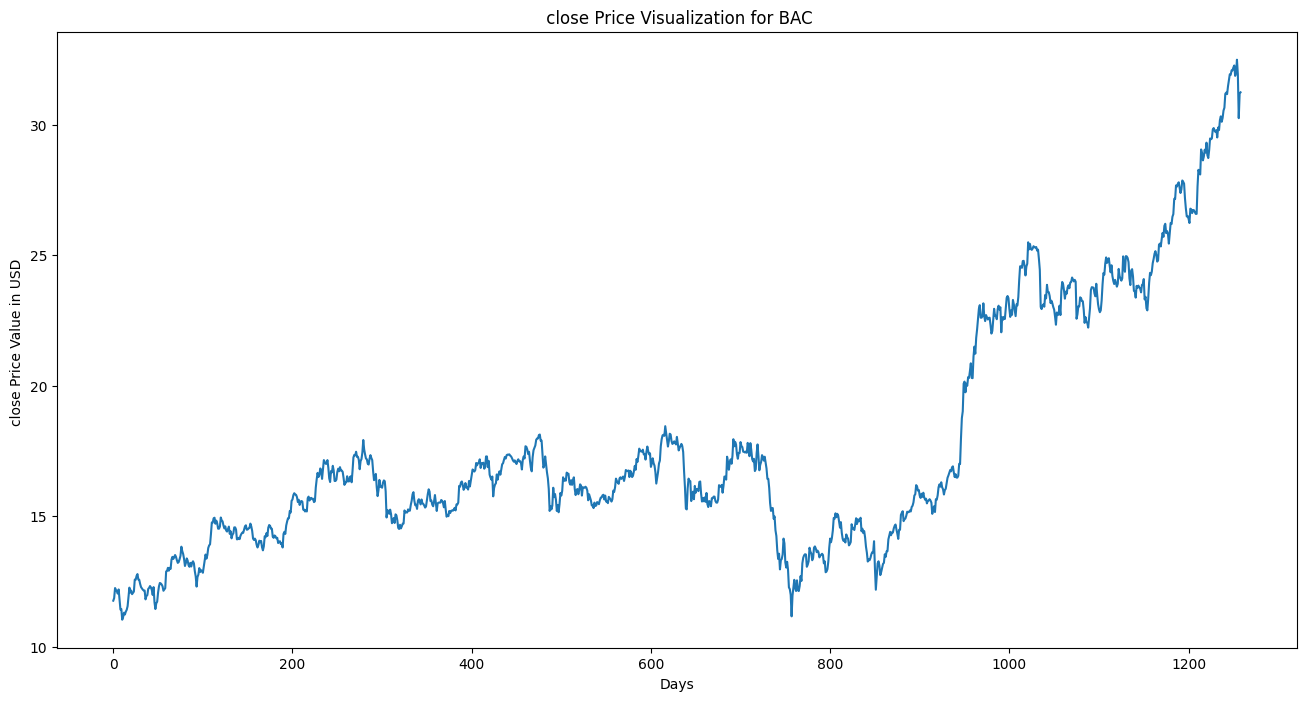

In [210]:
plot(filtered_df, 'BAC', 'close')

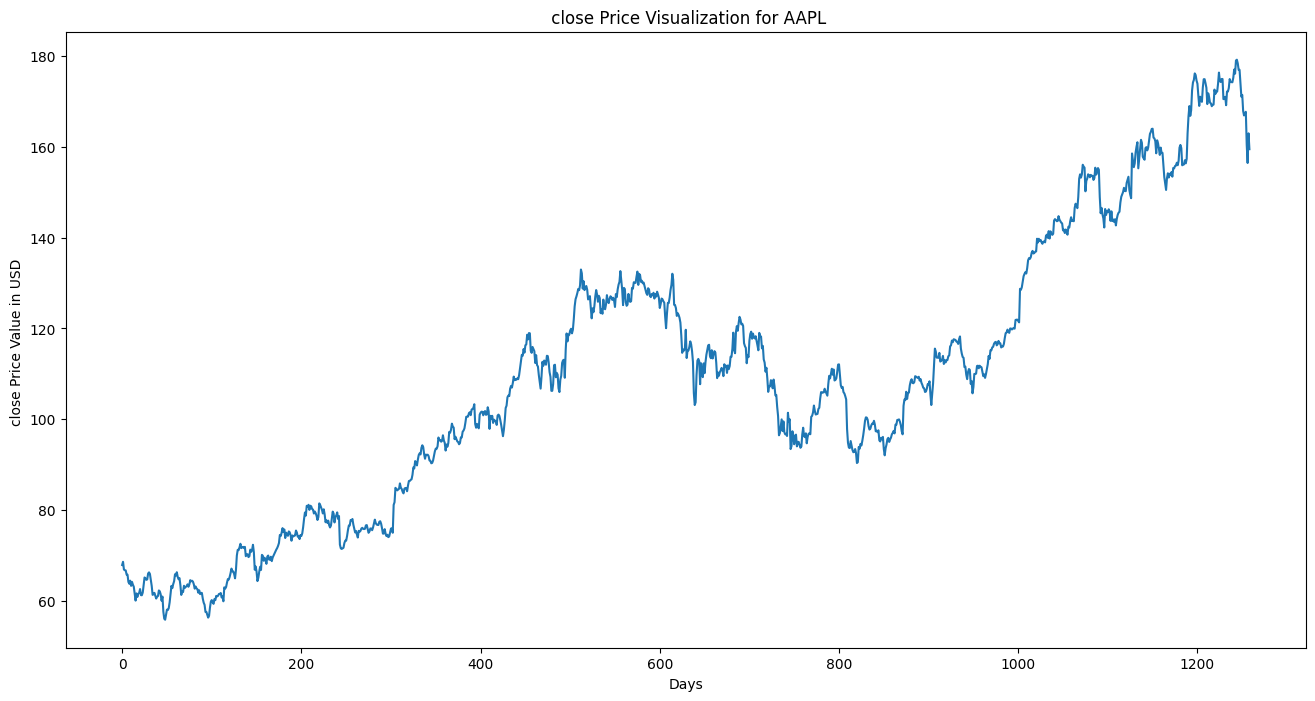

In [211]:
plot(filtered_df, 'AAPL', 'close')

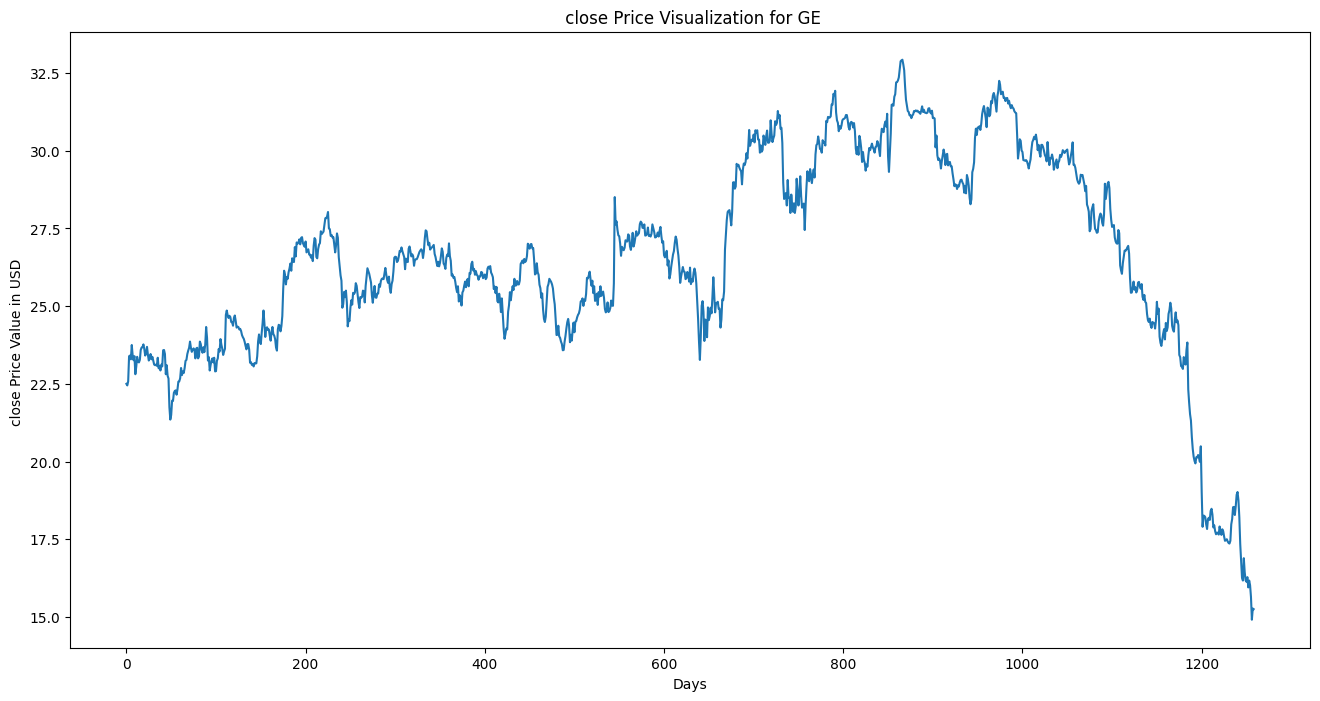

In [212]:
plot(filtered_df, 'GE', 'close')

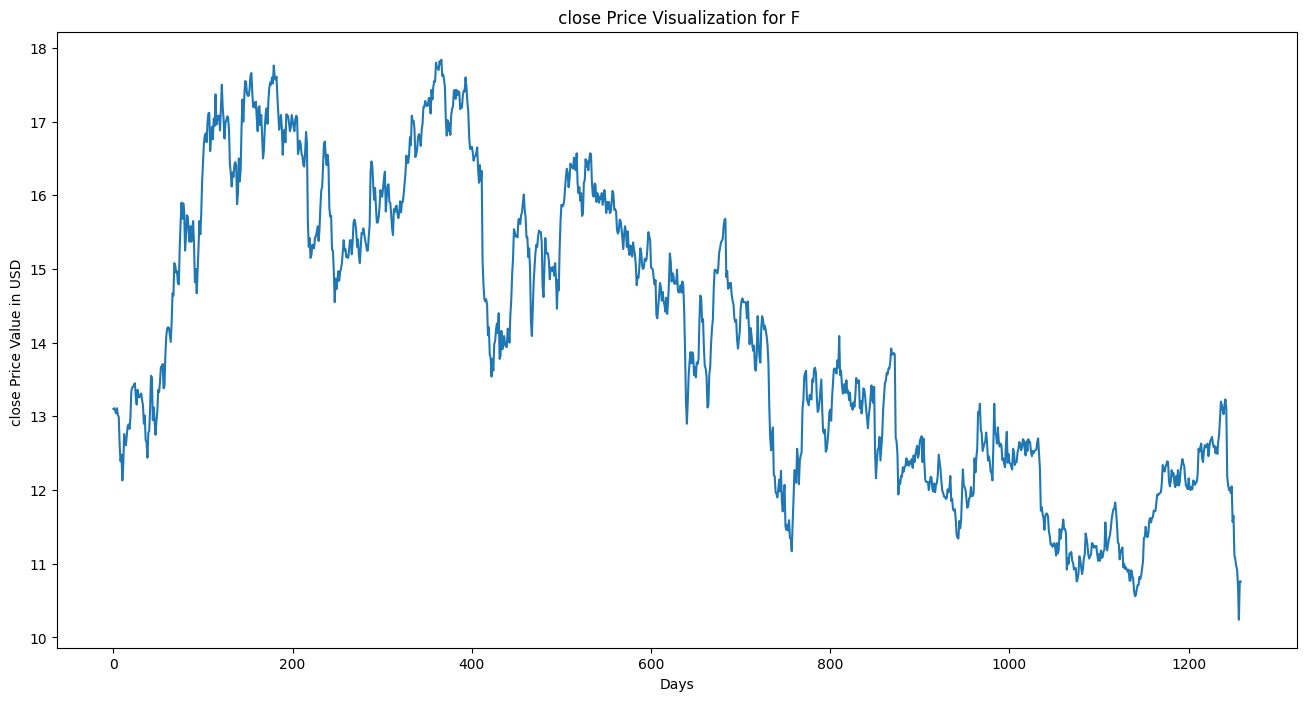

In [213]:
plot(filtered_df, 'F', 'close')

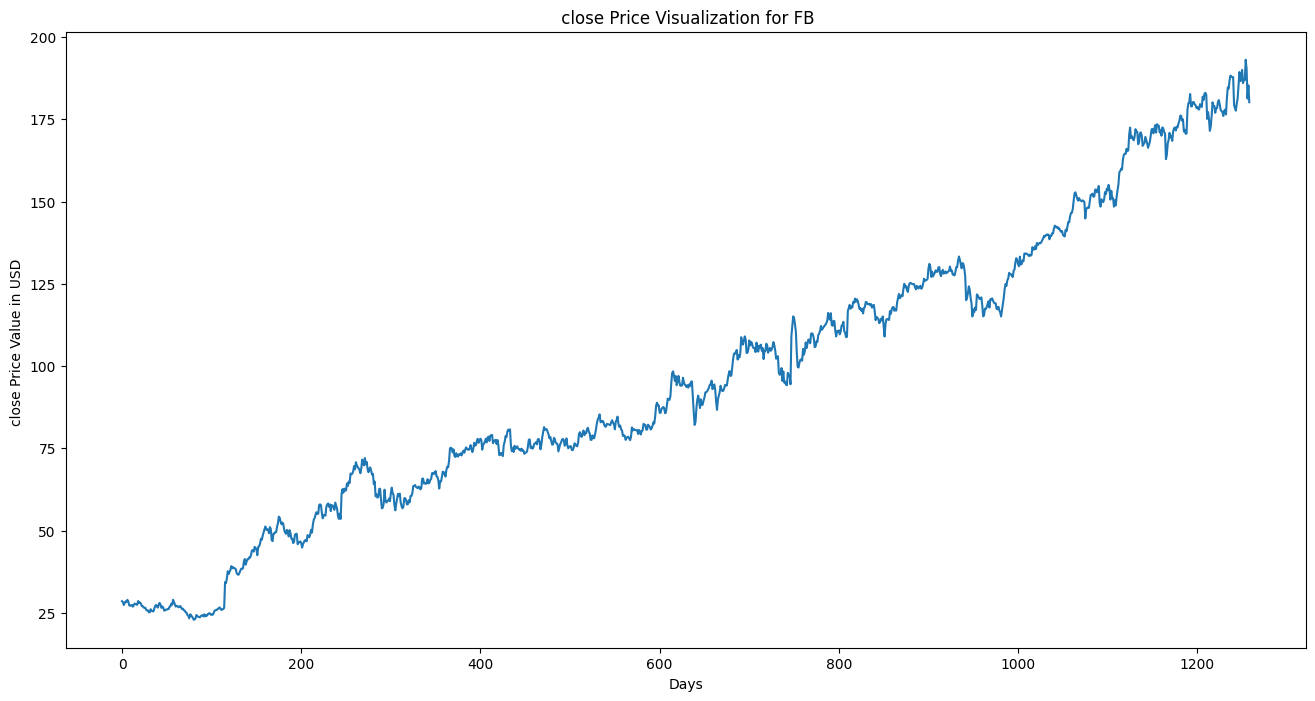

In [214]:
plot(filtered_df, 'FB', 'close')

Decision Trees

In [215]:
c_columns = filtered_df.select_dtypes(include=['object']).columns.tolist()
c_columns
c_tranformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessor
pp = ColumnTransformer(
    transformers=[
        ('categorical', c_tranformer, c_columns)
    ])

In [216]:
features_to_drop =['close', 'Name', 'Year']
X = filtered_df.drop(features_to_drop, axis=1)
X

open     high      low     volume
0      67.7142  68.4014  66.8928  158168416
1      68.0714  69.2771  67.6071  129029425
2      68.5014  68.9114  66.8205  151829363
3      66.7442  67.6628  66.1742  118721995
4      66.3599  67.3771  66.2885   88809154
...        ...      ...      ...        ...
12585  43.0400  44.0900  42.1000   35713522
12586  42.0000  42.2100  40.6100   40657381
12587  40.1400  41.5300  39.0100   45796837
12588  40.5500  43.9300  40.5500   66972802
12589  43.2600  43.5600  41.7400   51354784

[12590 rows x 4 columns]

In [217]:
y = filtered_df['close'] 
y

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
12585    42.4900
12586    40.8200
12587    39.4000
12588    43.8800
12589    42.0100
Name: close, Length: 12590, dtype: float64

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train_pp = pp.fit_transform(X_train)
# X_test_pp = pp.transform(X_test)
X_train.values

array([[2.27700000e+01, 2.30250000e+01, 2.25000000e+01, 9.10442610e+07],
       [1.97600000e+01, 2.02200000e+01, 1.97050000e+01, 1.67979154e+08],
       [1.29900000e+01, 1.30800000e+01, 1.29100000e+01, 8.06365750e+07],
       ...,
       [6.50600000e+01, 6.55600000e+01, 6.22100000e+01, 6.89260360e+07],
       [9.67500000e+01, 9.76500000e+01, 9.67300000e+01, 2.37949450e+07],
       [1.27300000e+01, 1.27700000e+01, 1.26400000e+01, 1.81170600e+07]])

In [219]:
y_train.values

array([22.64, 20.08, 13.06, ..., 62.76, 96.98, 12.64])

In [220]:
decisionTree = DecisionTreeRegressor(random_state=42)
decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)
y_pred

array([21.26, 31.04, 15.6 , ..., 16.38, 31.2 , 27.03])

In [221]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.2131913407108817
R-squared: 0.9998505809653134


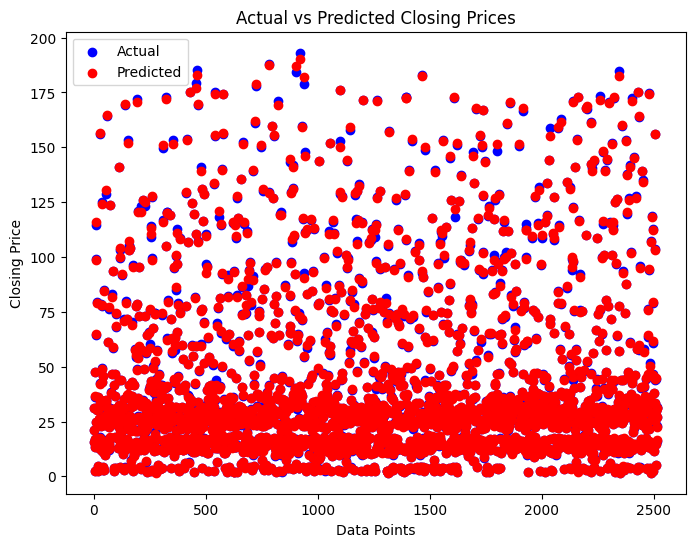

In [223]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Data Points")
plt.ylabel("Closing Price")
plt.legend()
plt.show()